In [1]:
import pandas as pd

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

Printing all of the misclassified reviews and the stopwords in them to figure out which stopwords should be removed.

In [2]:
def print_stopwords(review):
    review_tokens = word_tokenize(review)
    review_stopwords = list(stop_words.intersection(review_tokens))
    print(review, " --> ", review_stopwords)

In [3]:
stop_words = set(stopwords.words('english'))

reviews = pd.read_csv("data/derived/restaurant_reviews_textblob.csv", sep="\t")

In [4]:
incorrectly_annotated_reviews = []
for i, review in reviews.iterrows():
    liked = review['Liked']
    category = review['Category']

    if liked != category:
        incorrectly_annotated_reviews.append(review['Review'])

for review in incorrectly_annotated_reviews:
    print_stopwords(review)

Crust is not good.  -->  ['not', 'is']
Not tasty and the texture was just nasty.  -->  ['the', 'and', 'just', 'was']
Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.  -->  ['by', 'and', 'it', 'the', 'off', 'during']
Honeslty it didn't taste THAT fresh.)  -->  ['it', 'did']
The fries were great too.  -->  ['were', 'too']
Would not go back.  -->  ['not']
I tried the Cape Cod ravoli, chicken, with cranberry...mmmm!  -->  ['the', 'with']
I was disgusted because I was pretty sure that was human hair.  -->  ['that', 'because', 'was']
Waitress was a little slow in service.  -->  ['a', 'in', 'was']
That's right....the red velvet cake.....ohhh this stuff is so good.  -->  ['the', 'so', 'this', 'is']
- They never brought a salad we asked for.  -->  ['we', 'for', 'a']
Took an hour to get our food only 4 tables in restaurant my food was Luke warm, Our sever was running around like he was totally overwhelmed.  -->  ['an', 'was', 'our', 'my', 'to', 'in', 'only'

It was identified that the following stopwords sould be removed as they may give an indication to the sentiment: **'not', 'down', 'before', 'over', 'more', 'off'**

In [5]:
ignored_stopwords = ['not', 'down', 'before', 'over', 'more', 'off']
for word in ignored_stopwords:
    stop_words.remove(word)

Creating the TfidfVectorizer

In [6]:
corpus = []
for i, review in reviews.iterrows():
    corpus.append(review['Review'])

In [7]:
vectorizer = TfidfVectorizer(max_features=1000, stop_words=stop_words)
X = vectorizer.fit_transform(corpus)

feature_names = vectorizer.get_feature_names_out()
feature_names

array(['10', '100', '12', '20', '30', '35', '40', 'absolutely',
       'acknowledged', 'actually', 'added', 'ago', 'almost', 'also',
       'although', 'always', 'amazing', 'ambiance', 'ambience', 'amount',
       'another', 'anyone', 'anything', 'anytime', 'anyway', 'appetizers',
       'area', 'around', 'arrived', 'ask', 'asked', 'assure', 'ate',
       'atmosphere', 'attack', 'attentive', 'attitudes', 'authentic',
       'average', 'avoid', 'away', 'awesome', 'awful', 'baby', 'bachi',
       'back', 'bacon', 'bad', 'bagels', 'bakery', 'bar', 'barely',
       'bars', 'bartender', 'basically', 'bathroom', 'bathrooms',
       'batter', 'bay', 'beans', 'beat', 'beautiful', 'become', 'beef',
       'beer', 'before', 'behind', 'believe', 'belly', 'best', 'better',
       'beyond', 'big', 'bill', 'biscuits', 'bisque', 'bit', 'bite',
       'bites', 'black', 'bland', 'boba', 'boot', 'bother', 'bowl', 'boy',
       'boyfriend', 'bread', 'break', 'breakfast', 'brick', 'bring',
       'brought

In [8]:
doc_list = []
for i in range(len(corpus)):
    doc_list.append(str(i))
docs_tfidf = pd.DataFrame(X.todense(), index=doc_list, columns=feature_names)

docs_tfidf.head()

,10,100,12,20,30,35,40,absolutely,acknowledged,actually,...,years,yellow,yellowtail,yelpers,yet,yucky,yukon,yum,yummy,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Creating Logistic regression model for classification

In [9]:
liked = reviews['Liked']

X_train, X_test, y_train, y_test = train_test_split(docs_tfidf, liked, test_size=0.3)

In [10]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [11]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[135,  19],
       [ 27, 119]])

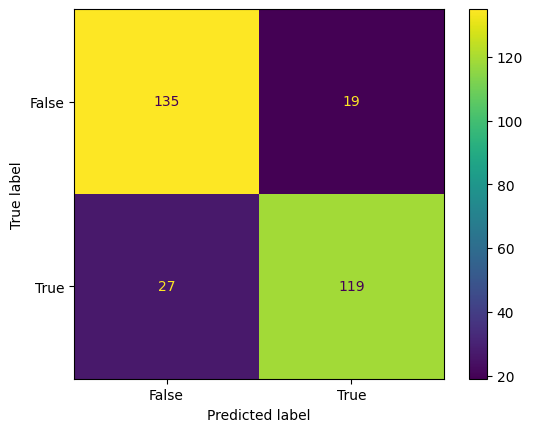

In [12]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels = [False, True])

cm_display.plot()

In [13]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.83      0.88      0.85       154\n           1       0.86      0.82      0.84       146\n\n    accuracy                           0.85       300\n   macro avg       0.85      0.85      0.85       300\nweighted avg       0.85      0.85      0.85       300\n'

In [14]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T 

,precision,recall,f1-score,support
0,0.833333,0.876623,0.854430,154.000000
1,0.862319,0.815068,0.838028,146.000000
accuracy,0.846667,0.846667,0.846667,0.846667
macro avg,0.847826,0.845846,0.846229,300.000000
weighted avg,0.847440,0.846667,0.846448,300.000000
